In [1]:
import pandas as pd
import datetime as dt

In [2]:
dataset=pd.read_csv("Quality data Preprocessed data.csv")

In [3]:
dataset

,Product,Time,Equipment,Char A,Char B,Char C,Char D,Char E,Char A6,Char A7,Char A8,Char A9,Char A10,Class
0,Product-1,2022-09-05,B1,82,17,12,126,119,B,C,A,H,H,H
1,Product-2,2022-09-05,B1,96,13,13,72,42,B,B,A,B,B,B
2,Product-3,2022-09-05,B1,60,12,13,56,33,B,B,A,B,B,B
3,Product-4,2022-09-05,B1,53,12,11,45,21,B,B,A,B,A,B
4,Product-5,2022-09-05,B1,56,12,17,49,26,B,B,B,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,Product-5640,2023-04-20,B1,84,3,14,63,61,B,A,B,B,C,C
5640,Product-5641,2023-04-20,B4,52,2,12,42,20,B,A,A,B,A,B
5641,Product-5642,2023-04-20,B4,56,2,9,66,39,B,A,A,B,B,B
5642,Product-5643,2023-04-20,B1,51,3,13,67,43,B,A,A,B,B,B


In [4]:
dataset.columns

Index(['Product', 'Time', 'Equipment', 'Char A', 'Char B', 'Char C', 'Char D',
       'Char E', 'Char A6', 'Char A7', 'Char A8', 'Char A9', 'Char A10',
       'Class'],
      dtype='object')

In [5]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Product    5644 non-null   object
 1   Time       5644 non-null   object
 2   Equipment  5644 non-null   object
 3   Char A     5644 non-null   int64 
 4   Char B     5644 non-null   int64 
 5   Char C     5644 non-null   int64 
 6   Char D     5644 non-null   int64 
 7   Char E     5644 non-null   int64 
 8   Char A6    5644 non-null   object
 9   Char A7    5644 non-null   object
 10  Char A8    5644 non-null   object
 11  Char A9    5644 non-null   object
 12  Char A10   5644 non-null   object
 13  Class      5644 non-null   object
dtypes: int64(5), object(9)
memory usage: 617.4+ KB


In [6]:
dataset['Time']=pd.to_datetime(dataset['Time'])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Product    5644 non-null   object        
 1   Time       5644 non-null   datetime64[ns]
 2   Equipment  5644 non-null   object        
 3   Char A     5644 non-null   int64         
 4   Char B     5644 non-null   int64         
 5   Char C     5644 non-null   int64         
 6   Char D     5644 non-null   int64         
 7   Char E     5644 non-null   int64         
 8   Char A6    5644 non-null   object        
 9   Char A7    5644 non-null   object        
 10  Char A8    5644 non-null   object        
 11  Char A9    5644 non-null   object        
 12  Char A10   5644 non-null   object        
 13  Class      5644 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 617.4+ KB


In [8]:
startdate="2022-09-05"
enddate="2023-04-20"
df=dataset[dataset['Time'].between(startdate,enddate)][['Time', 'Char A']]

In [9]:
df

,Time,Char A
0,2022-09-05,82
1,2022-09-05,96
2,2022-09-05,60
3,2022-09-05,53
4,2022-09-05,56
...,...,...
5639,2023-04-20,84
5640,2023-04-20,52
5641,2023-04-20,56
5642,2023-04-20,51


In [10]:
column='Char A'

In [11]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(df[[column]])
print("Len:",data1.shape)

Len: (5644, 1)


In [12]:
len(data1)

5644

In [13]:
training_size=round(len(data1)*0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

4515
X_train length: (4515, 1)
X_test length: (1129, 1)
y_train length: (4515, 1)
y_test length: (1129, 1)


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Char A"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Char A"])'

In [16]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)

RMSE-Testset: 0.14470013185622402
maPe-Testset: 511613463204.43353
RMSE-Testset: 0.14473397321028744
maPe-Testset: 502411142850.42444
RMSE-Testset: 0.14469755802568074
maPe-Testset: 512217541289.5985
RMSE-Testset: 0.14473397321028744
maPe-Testset: 502411142850.42444


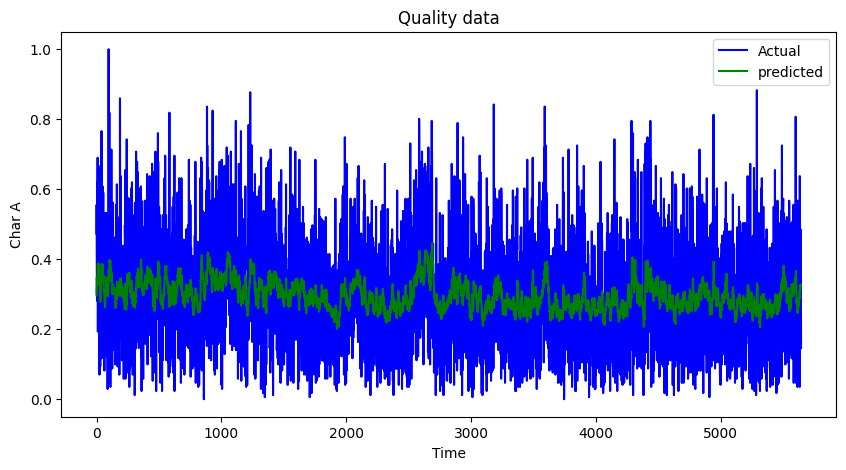

In [17]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","predicted","Quality data","Time","Char A")

In [18]:
len(data1)

5644

In [19]:
y_test

array([[0.19298246],
       [0.38011696],
       [0.4502924 ],
       ...,
       [0.32163743],
       [0.29239766],
       [0.14619883]])

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,[column])

In [21]:
aTestNormTable

,Char A
0,0.473684
1,0.555556
2,0.345029
3,0.304094
4,0.321637
...,...
5639,0.48538
5640,0.298246
5641,0.321637
5642,0.292398


In [22]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [23]:
actual_stock_price_test_ori

array([[82.],
       [96.],
       [60.],
       ...,
       [56.],
       [51.],
       [26.]])

In [24]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [25]:
actual_stock_price_test_oriA

,Char A
0,82.0
1,96.0
2,60.0
3,53.0
4,56.0
...,...
5639,84.0
5640,52.0
5641,56.0
5642,51.0


In [26]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [27]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

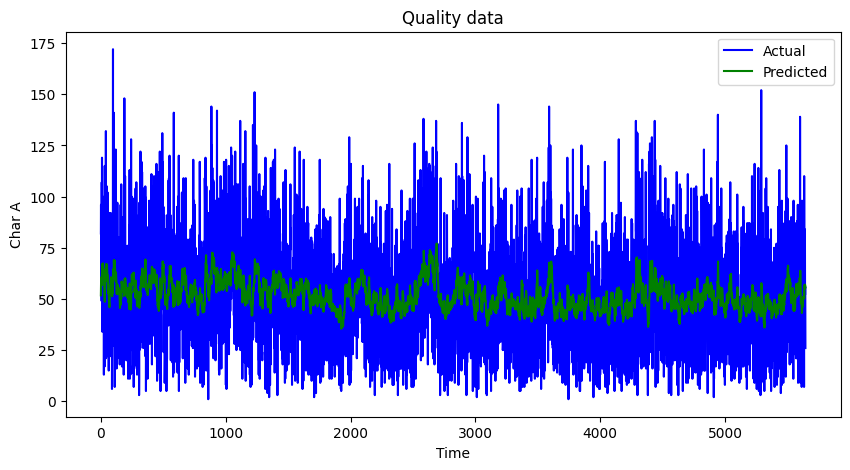

In [28]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Quality data","Time","Char A")

In [29]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 24.749509418959153
maPe-Testset: 0.7157561420623457


In [30]:
forecast=model_fit.predict(len(data1), len(data1)+10)

In [31]:
forecast

array([0.30576893, 0.3054269 , 0.30509793, 0.30478151, 0.30447717,
       0.30418444, 0.30390289, 0.30363208, 0.30337161, 0.30312109,
       0.30288012])

In [32]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["CharAfore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["CharAfore"])

In [33]:
forecast_stock_price_test_oriF

,CharAfore
0,53.286487
1,53.228
2,53.171745
3,53.117638
4,53.065595
5,53.015539
6,52.967394
7,52.921086
8,52.876546
9,52.833706
